<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sampling-random-variables" data-toc-modified-id="Sampling-random-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sampling random variables</a></span></li><li><span><a href="#Coin-toss" data-toc-modified-id="Coin-toss-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coin toss</a></span></li><li><span><a href="#Monty-Hall-problem" data-toc-modified-id="Monty-Hall-problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Monty Hall problem</a></span></li><li><span><a href="#Compute-$\pi$" data-toc-modified-id="Compute-$\pi$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compute $\pi$</a></span></li><li><span><a href="#Stochastic-processes" data-toc-modified-id="Stochastic-processes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stochastic processes</a></span><ul class="toc-item"><li><span><a href="#Random-walk" data-toc-modified-id="Random-walk-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Random walk</a></span></li><li><span><a href="#Snakes-&amp;-ladders" data-toc-modified-id="Snakes-&amp;-ladders-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Snakes &amp; ladders</a></span><ul class="toc-item"><li><span><a href="#Snakes-&amp;-ladders-with-infinite-tree" data-toc-modified-id="Snakes-&amp;-ladders-with-infinite-tree-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Snakes &amp; ladders with infinite tree</a></span></li></ul></li></ul></li><li><span><a href="#Num-typeclass" data-toc-modified-id="Num-typeclass-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><code>Num</code> typeclass</a></span></li></ul></div>

We will use [HaskellR](https://github.com/tweag/HaskellR) to have some nice plots when needed

In [17]:
:ext QuasiQuotes

In [18]:
import qualified H.Prelude as H
import Control.Monad
H.initialize H.defaultConfig

# Sampling random variables

In [19]:
import Data.Random

Let us remind types:

```haskell
sample     :: MonadRandom  m   => RVar a -> m a
sampleFrom :: RandomSource m s => s -> RVar a -> m a
```

for sampling and
```haskell
instance Distribution StdUniform Double
instance Distribution Normal Double

stdUniform :: Distribution StdUniform a => RVar a
normal     :: Distribution Normal a     => a -> a -> RVar a
```

we can now try to sample few values:

In [24]:
sample stdUniform :: IO Double  -- uniform

2.7530415379165563e-2

In [26]:
sample stdUniform :: IO Bool  -- unifor

True

In [27]:
sample (normal 1 1) :: IO Double  -- normal

1.9772210015522618

Since `RVar` is a monad, we can use the whole variety of functions that manimulate monadic values, e.g.:

```haskell
replicateM :: Monad m => Int -> m a -> m [a]

-- specialized for us
replicateM :: Int -> RVar a -> RVar [a]
```

to construct a random variable of list type.

In [28]:
replicateM 10 $ sample stdUniform :: IO [Double] -- 10 uniforms Double

[0.3685645432917104,0.30772605059821645,0.29678726330758765,0.6781379871654991,0.5542588755887883,0.6523544872204408,0.9884006847091482,8.803403976268775e-2,0.22097947761293746,0.6086313633109024]

In [ ]:
-- 10 normal Double

This tells us nothing. But let's do some simple plots:

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC4lBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICCgoKDg4OFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5udnZ2enp6fn5+goKChoaGioqKlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW3t7e4uLi5ubm7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///8AO5l5AAATVUlEQVR4nO3dfXwU1b3H8RPQAnkgwXihgEAFAhYK4aE8KASwsfaCIirYlnor11KqFLEqtNZGsdcHLK1PvXLRPl0pFMGr9hrloYrhXrAKWhfBiAhCMSEp4TGQ5Pzf2TnJzp5zdrK7Z4bszG+/n9dLyOs3MyeTvGWTSTYZxhHpWKZPAJ3fAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATL9TA5xjba/01nT3EGTvn16pvl3R63H3radbZr1fUIVEEHsuqvKx6M5u0xX0rgDuwOODjx1tiY4/A09m6drYCuANzgO13+5uT8y+e8Z7ly9jzvOGOwbmlqyz1ozf1GP0nNpYfZsVvjV3LKyfkF125g+9lA1f06f+rqtF5U6rFYm0HRA//aXTQekDrqm1Zr+nVkQU31HN1Q0ALO/BlpaWlBQK4pnvOzDLW5+QrX2L372uZyvpN78Ye4y2Xs9GzutjAef3Y2k+7dZ46jvVr2cvYF4Za/w3KY7PstWIHvFLK7ngnOhEHtK3a9jpPM9Z1WCd2D1c3BLSwA4ts4NdZyd/54hv22g/Rm1i/Br6FFTZvZpc18gdsYPZQ7ZnNVy/jjV3Z5xZwhJexb7VsZIPstWIHWA8I6+2JOCC2amsW8Dq+gk3m6oaAFnbguIfo2otYzvgHDouPwU+w260tfdn+x9lizv9mA3dttkYf/vy6/owd3sv6cj6XrbIeqwfYa8UOiAOOHhBbtbXTLKeJb7XWUzcENELAvH7ZKMa674kD7s+qH2F3cP6++BhsTd66MHfuM/lR4AFR4N8owNYBccDRA2Krtma/piprPXVDQCMEvO67v+efXM4et4Df5BtZ/wb+BuvevIENOsHviQHfzZbwt1kC4NgBCnBs1dZiwOqGgEYI+HXWddaNuWyz9aH1+vdbylj/GbnsF7xxIOtnfWLcBrycFV7TM4cd1IBjByjAsVVbiwGrGwIaIWC+elz33JG/4fyFXtZl0rFFA3NLn7Uuk6qvKhj2XzHgE9fnfvm/p7KVGrBzgPIQ3bZqa85DtLIhoIUaOJVqq3ZGQa7O9HlkKvLAey7IqVhRwp7N9HlkKvLAvLKsMG/UqpbkO7bb+rZL7rW+nFTHRR84ywMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMTLcuCnHlb7XaZPyeeyHHhUpdqETJ+Sz2U58NQUJuEOwEkn4Q7ASSfhDsBJJ+EOwEkn4Q7ASSfhDsBJJ6n0n+VqV3/i9dz8KZzA1Uu1zG604hfwvHfqlBZ7uvOLf2UaOLJG7YUTyY9as0j9+sSKCqNX7xvwx+rkxwC2W3CX+rXCr7VzV6q21jylTrYAOHEZB96tTioA7GcATjpJJR142lfUT7tGbDJa2mMpATcfaz5fr58s8IRV6mTFBnXSWK22531t1GB0QrGSA5+uKLmAdR58/xlvr8ilrAZePfn7ShMuUSc33mF0QrGSA9981ebas0e3zvp3b6/IpawG/sNKdfLo19TJrkVGJxQrOXDhIfuvkxd7e0UuBQ74cu0x8mAK64QZuPQ5+68XRnt7RS4FDjhPfYz8/qAU1gkz8Pbew+bcOmdEn+1prz1T+/rd4OPqPoEDLkphH70wA/NzlSsfXllpcAd1/T0zq06dAFgqI8DGl0kAlgoqsPllEoClggqsXyYd3WFXVZPkSABLBRVYv0yqFJ9dlv80yZEAlgoqsOtl0h+fTnIkgKWCCux6mRRw4Oa3d6jpX7JIBXiCts4ubZ8wA7teJnUY8Dbtaw/ld6n76MAfjlKf9LF4VgqnqAMXas8eGXRS3ScV4EVfV9+MK+9V98nQZRLnn9frsw4Dfuop9auHt85W99GBdy9QJ/XXpXCKOrA+ma496SQV4Jm3q2/Gzd9R98kE8IxP+YEJnS6c9pm6oeOA16iTH4US+CfqZGEggLtE+JxbTp5doj2+Adgp5MADLYX67uoGADuFGnjjuWte4fwvfdQNCvA3tW8t9NDWArBUMICv6t+l6DK+qWiFukEBTuV9lWHgGeqTl+vKUjhp6sCcn/3oTb5tkzYOHfDBrtqDTCqc9IFdCh3wJ71TOMWgAb9aPFZpjHb13F4ANpj860H1of7m8wa8rlSdHJmjnVA7BQ94/gL1Zx1m/lrdJ8PAX7x2tlLBVnUfAIt04LKF6s8dTblT3SfDwD2PqJOSzeoEwKIEwE+okzkAjg/AIgDbdSzwVevVh98Zf1P3MQOu/I668nPfVvcBcHoZAPdeqn4C1fN/1X3MgJ+8VF153jB1HwCnlwnwPnUy7M/qxAz4Ce1rUn8GcDQAG0wALAKwFIBFAJYCsAjALgHYYAJgEYClACwCsBSARQB2CcAGEwCLACwFYBGApQAsArBLADaYAFgEYCkAiwAsBWARgF0CsMEEwCIASwFYBGApAIsA7BKADSYAFgFYCsAiAEsBWARglwBsMAGwCMBSABYBWArAIgC7BGCDCTngxPdsALBTmIFd79kAYKcwA7ve2g7ATmEGdr21HYCdwgyc6j0bACwVHuBU79kAYKnwAKd6zwYAS4UIGJdJarSAcZmkTWgB4zJJm9AC1i+TtonfNPbtn0n7AVgqPMD6ZdIB8bsC73tE2g/AUuEBxmWSNqEFjMskbUIM2K5Kvz80gJ3CD1x8QBsB2CnMwHmdo7FOndUNAHYKM/AHE2dX19T02Knd0B3ATmEG5k2/HPoyHqLjIwbM+UfT5hYA2IkcMG9eeVOtNgSwU9iBEwZgJwCLACwFYBGApQAsArAdgA0mABYBWArAIgBLAVgEYJcAbDABsAjAUgAW
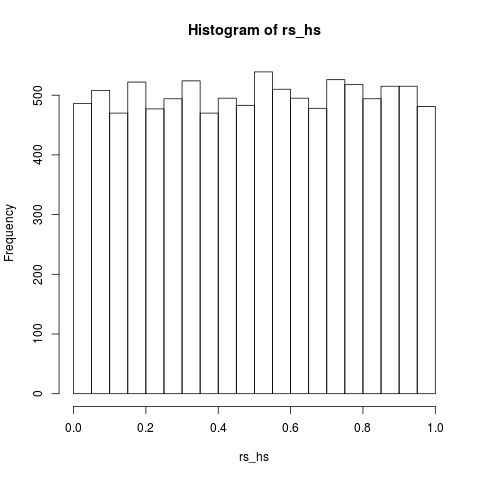

In [29]:
rs <- sample $ replicateM 10000 stdUniform :: IO [Double]  -- get bigger sample
[rgraph|hist(rs_hs)|]  -- plot histogram with R

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC3FBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dZWVlaWlpbW1tdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWYmJiZmZmampqbm5udnZ2enp6fn5+goKChoaGioqKjo6OlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW3t7e5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///9ii81QAAARnUlEQVR4nO3diXsV1RnH8cNigQRIWCoSBGoggGAIgQoiS5TUKqhRiRYqiFqpUrCt0NYGC22JotSlmgJqFywoS+sWhWjBaOMCoo1lEZVNISEFjZCE5PwDnUxuxmTOzNyZuWfuPfPe3/d5JI/vzJwc7ufhJgM3CeOIdCzRG0DBBmDiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeKEGbmBsr/ZmOlvBGWuQteo7WR0fsT96mnWS9Y7iEkXgcaw8llVns0mv2R8FcBxrA/zll03GOEbg6ew5h6MAjmPfAOsP+/bJ3fvO2K35MraOn1o4NCVntaZefWOv3GfZOH6U9Xlj3AZeOqF7+uVv870sc1XGoIfLc1On7m9ZrPWC5svvbR5ELois2pr2nl4a3eP6Gm4+oGhhBx6Rk5PTowX4eM8O10xhGbUvfIctPdCUxwZO78Ye5E0TWW5BFx04dSDb8Fm3TnkXs4FNexn71nDtvyGprEBfy7jghRy28L3mScsFrau2vs/TjHUd2ZHdw80HFC3swC3pwK+yrM/5ouv36k/R29jAU/w1ltZYxkbU8ft0YLai6kzZFct4XVd2TAOu5FPYTU1b2RB9LeMC7Qlhkz5pucBYNZIG/BxfxSZz8wFFCztwm6foqt6sw/j7jrZ8DH6U/Vg7MoB9+ghbxPmHOnDXRm30399dO4ixo3vZAM5nsdXac/VgfS3jgjbAzRcYq0Y6zTqc5Tu09cwHFI0QMK9ZNoaxnnvaAA9i++9nCzn/oOVjsDZ545yUWU90bwYe3Az8pAlYu6ANcPMFxqqR9PdUrq1nPqBohICfu/nP/JOJ7BENeDvfygad4v9iPRs3syFf8XsM4J+zxfwdZgFsXGACNlaNZACbDygaIeBXWdeCG1JYmfah9boPmqawQTNS2EO8LpMN1D4xbgVeydKuPrcDOyQAGxeYgI1VIxnA5gOKRgiYP3Nxz5TRT3K+sZ92m3RyQWZKzhrtNml/fo+RfzKAv7ou5cK/5bESAfibC0xP0a2rRvrmKdp0QNFCDeymqvJdzSBXJHofiYo88J7OHYpWZbE1id5HoiIPzEunpKWOWd0U/UTHNrXecm+Qsqn4RR84yQMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMRLcuA/Fos9lehNSS3JgceUik1I9KakluTAeS5n4Q3ArmbhLYmA/3dCbLLFeQAOZzXnzxRLtzgRwOGs6nqLIYDpBGDiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2D7Gk82Br2P4AOwTaeLsjqzTkOXnonDboIMwDbNzi+rqq/eUXBLHHYTZAC2Ke2I/qa2b9BbCTgA25SzVn+zMTforQQcgG2q6D+ycF5hdkZFHHYTZAC2q6G0pLiktCH4vQQbgO1LrtukERY/cvaxoHcXWLhNEupp8SNnw/sJCG6TXM3C+7SN2yRXM8rASXeblGzASXeblGzA4m3SoZZPPLbsCW5bAQRgp47VtPmf8pZbh1lFgexISjXiD/ved63FeQDmfMZn/OCEjudcdth84O+PB7IjGVUOFX/Y95XnW5wIYM67VPLCObX1iwvMBxQG3n2XONszwOJEAOvAmR9pT3o9zQcAHIZcAG9tuPoFzl/PMB8AcBiKDpw/qEv6CL4tfZX5AIDDkJvPouv3bedvbhPGAA5DMbyqEsBhCMCuZpSBK1szHwBwGIoOPJ6lDNAzHwBwGIoO3DT3TusDAA5DLj4Gv7LSeg7gMIRPslzNAKxWADYCsKsZgNUKwEYAdjUDsFoB2AjArmYAVisAGwHY1QzAagVgIwC7mgFYrQBsBGBXMwCrFYCNAOxqBmC1ArARgF3NAKxWADYCsKsZgNUKwEYAdjUDsFoB2AjArmYAVisAGwHY1QzAagVgIwC7mgFYrQBsBGBXMwCrFYCNAOxqBmC1ArARgF3NAKxWADYCsKsZgNUKwEYAdjUDsFoB2AjArmYAVisAGwHY1QzAagVgIwC7mgFYrQBsBGBXMwCrFYCNAOxqBmC1ArARgF3NAKxWADaKAC947aznSwEchiLARaP7zX+1wflUcwAOQ8ZT9P6HJve77aV6D5cCOAwZwDUb5vQadUnGRveXAjgMRYAfyEv93qMfc77tPPeXAjgMRYDnPndKf/sV/gTTBK57vJRvWnnG06UADkMR4B+OreA7L51rc1LjyUaLKYDDUAS4+37tl0/TrM44XZTVmXUaulT44w3gMBQBHvKm9kt5ptUZs/PLquqrdxTcYj4A4DAUAV7XZ8GDi/o+ZXVG2hH9TW1f8wEAh6HW++CPlv2oaKflGTlr9Tcbc80HAByGov9jQ0X/kYXzCrMzKswHAByGIsCvXDK8OctTGkpLiktKxb+oBnAYigAPWrK7UsvmJNwmhR64/9e2Z+A2iRMAXrnC9t8KcZvECQBfmtpjmM3HYNwmcQLAlS1ZnYHbJE4AmPOzR5qsz8BtEicAfGRat+4Hxu+3PEW4Tao/obf2sTjsz18ANooA33RHbb/GosttTjLdJm2ZqTfhZwHvzX8ANooA967h/fiJFKszcJvECQCP/qcGvHWU1Rm4TeIEgMv63NBtzrdftDoDt0mcADCvemr56iOWZ+A2iVMAtg+3SZwA8PiWLE/BvyYRAC4vL39j/dT1ni5NJuBe08Qy
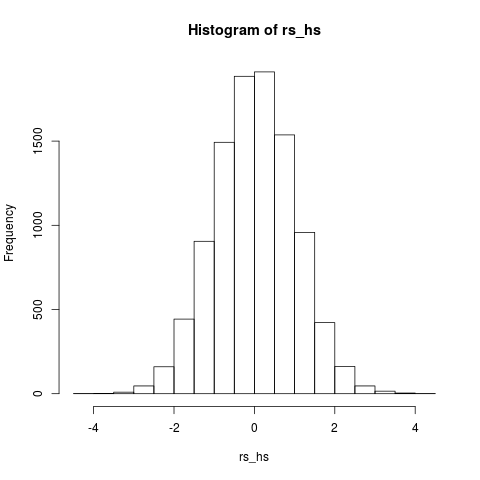

In [30]:
rs <- sample $ replicateM 10000 stdNormal :: IO [Double]
[rgraph|hist(rs_hs)|]

# Coin toss

Construct random variable for our custom type, using other predefined random variables.

In [31]:
import Data.Random.Distribution.Bernoulli (bernoulli)

We will use:

```haskell
bernoulli :: Distribution (Bernoulli b) a => b -> RVar a
```

which constructs random variable with Bernoulli distribution:

- it returns either of two values; `(True, False)` for us;
- `True` with probability `p` and `False` with probability `1-p` 

We will draw Boolean values, so for us it will specialize to:

```haskell
bernoulli :: Double -> RVar Bool
```

In [32]:
data Coin = Head | Tail deriving (Bounded, Enum, Show)

In [34]:
toss :: RVar Coin
toss = do
    b <- bernoulli 0.5
    case b of
      True -> return Head
      False -> return Tail

In [37]:
sample toss

Head

We can make it simpler for those more familiar with monadic and applicative syntax:

In [38]:
bool2Coin :: Bool -> Coin
bool2Coin True = Head
bool2Coin False = Tail

In [39]:
toss = bernoulli 0.5 >>= return . bool2Coin

Line 1: Use <$>
Found:
bernoulli 0.5 >>= return . bool2Coin
Why not:
bool2Coin <$> bernoulli 0.5

In [40]:
toss = bool2Coin <$> bernoulli 0.5

In [41]:
xs <- fmap show <$> sample (replicateM 10000 toss)

In [42]:
[rprint| table(xs_hs) |]

xs_hs
Head Tail 
4972 5028

# Monty Hall problem

From [wiki]():

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

![img](Monty_open_door.svg.png)

In [43]:
import Data.Random.List (randomElement)
import Data.List

We start with types and utility functions:

In [44]:
data Result = Win | Loose deriving (Eq, Show)
data Door = First | Second | Third deriving (Bounded, Enum, Eq, Show)

result :: Door -> Door -> Result
result prize choice | prize == choice = Win
                    | otherwise       = Loose
doors = [minBound..maxBound]

Now, we implement two strategies:

In [46]:
mhChange :: RVar Result
mhChange = do
    prize <- randomElement doors
    choice <- randomElement doors
    open <- randomElement (doors \\ [prize, choice])
    let change = head $ doors \\ [choice, open]
    return $ result prize change 

In [48]:
mhKeep :: RVar Result
mhKeep = do
    prize <- randomElement doors
    choice <- randomElement doors
    return $ result prize choice

In [49]:
mhKeep = result <$> randomElement doors <*> randomElement doors

Now, small utility function that compute frequency on `Win` results in the list:

In [50]:
winFreq :: [Result] -> Double
winFreq rs = let l = fromIntegral . length
                 w = l $ filter (==Win) rs
             in w / l rs

In [51]:
change <- sample $ replicateM 10000 mhChange
winFreq change

0.6654

In [52]:
keep <- sample $ replicateM 10000 mhKeep
winFreq keep

0.3335

# Compute $\pi$

A very basic (and inefficient) way to approximate $\pi$.

<img src="pi.jpg" width="400px">

In [53]:
inCircle :: Double -> Double -> Bool
inCircle x y = x^2 + y^2 <= 1

In [56]:
areaMC :: [Bool] -> Double
areaMC ps = let l = fromIntegral . length 
            in l (filter id ps) / l ps

In [57]:
point = inCircle <$> stdUniform <*> stdUniform

In [58]:
piMC n = (*4) . areaMC <$> sample (replicateM n point)

In [59]:
piMC 1000000

3.141448

# Stochastic processes

Let's just generalize type, in obvious way, *because we can*:

In [63]:
run :: Int -> (a -> RVar a) -> a -> RVar a
run n t s0 = t s0 >>= run (n-1) t

We may also need a variant that remembrs whole history (here, in reverse order, but it doesn't matter)

In [64]:
runH :: Int -> (a -> RVar a) -> a -> RVar [a]
runH n t x = runH' n t [x]

runH' :: Int -> (a -> RVar a) -> [a] -> RVar [a]
runH' 0 _ xs = return xs
runH' _ _ [] = return []
runH' n t h@(x:_) = do
  next <- t x
  runH' (n-1) t (next:h)

## Random walk

Now, we implement what we discussed:

In [65]:
type State = (Int, Int)

Randomly select one of 8 directions:

In [66]:
jump :: State -> RVar State
jump (x, y) = do
    (dx, dy) <- randomElement [(0, 1), (1, 1), (1, 0), (1, -1), 
                               (0, -1), (-1, -1), (-1, 0), (-1, 1)]
    return (x + dx, y + dy)

In [67]:
path <- sample $ runH 10000 jump (0, 0)

In [68]:
import Control.Arrow

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAADAFBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////isF19AAAgAElEQVR4nOydB1gTSRvHl46A0qQX6b2Hspse2BC6CAZRUbEFxYI9du4UNfZeomI5O/buicrZG/ZesGA/FbAgPfPtbgLSQVEO8uX/8JDN7GR2N7/s7JR33hcCMkm1oP/6BGT6vZIBlnLJAEu5ZIClXDLAUi4ZYCmXDLCUSwZYyiUDLOWSAZZyyQBLuWSApVwywFIuGWAplwywlEsGWMolAyzlkgGWcskAS7lkgKVcMsBSLhlgKZcMsJRLBljKJQMs5ZIBlnLJAEu5ZIClXDLAUi4ZYCmXDLCUSwZYyiUDLOWSAZZyyQBLuWSApVwywFIuGWAplwywlEsGWMolAyzlkgGWcskAS7lkgKVcMsBSLhlgKZcMsJRLBljKJQMs5ZIBlnLJAEu5ZIClXDLAUi4ZYCmXDLCUSwZYyiUDLOVqAuD3aTK1AO0o/l2At3UTyvTfi/L4twFe+vOflemXqa8MsHRLBljKJQMs5ZIBlnLJAEu5ZIClXDLAUi4ZYCmXDLCUSwZYytWSAX+eKRBcamoh/+9qyYBvRKYfpZ9uain/52rRgIcCkMvIaGox/99qEYCzBvBwnaqWfMuFx9v3kdafl5Dz86fx/66WAPgxfCEL0z1mRtX0sj4hPqHb568Y2qfs50/j/10tAPBj+KF4I7c64VM6UwrCAjgyvk1QcwLmorjmSd4tIt7F5ZZ5PyzPkEt9Vjn/GYt/2QcLglCMbzFfBvnn1JyAd4QWAJBh+If4XY9s/H8G813g9xxjLlbKfoY+NiysABSEbQfF3LU/fyL/32rWKnoHxisjOUlMWAwYZFDrAHyW9mGH/RARwAhvkfH9aTXvMxi7h+cli5L+KBuyvhwwOG6Ti/1/aO1lNQfMdnF3ygADnZxsSQ66Dh70gqnuJI9FBVFra5QkGkbycPj082f3f6NmbmTtIDklA1GSx1zu2nLAReZMnPAMDwcHAfgaaEXKeA7DfmdoH4h+MN6Wnl+zHNHAGUWRm37+5P5/1MyAU2k2yaAsnvFHMdesHHBgBk6Yz+ywZcCUwAPch8xUGDahfwASwLURlvFttJoX8Bs9Emkj2DpOFGNvA60Up+2Vs3DGkv8E8899MSeRtP+6KL9+K2RCIpHa2JOsTUmku2XDSCSDHVjWjI7ij4gGepQuXPDzp/b/pOYF/KwX/n/NOjB5F82dsQ5/s49zEUlPIPZ+5ezH+lJk1yuInz18ByzoXQb2lHeqIvx3gH+YVGJbNJBG7Z5y+OdP7f9JzQn4U86NXvgrDrjD2R5XOak5Obs4+UW37AnA+ehfORhg95BJJB/Sc5iP8cUBlxA94IgHjMk+TxhYjQ5EiWNSl63QkQFulJoTsIdrqNkTrNsTHFIwueMj01AXOS53QD6gXu9HAD7P5QYnirhjCq3NOnQBk/1wsLdYnxd3LgbgjhcXl+fZmcb3E4O5ndn5w2JLf/7c/o/UnIDfkndS4ScFoTu3h41haiI7KW5E8isjZkJ5lumJnbkzaWTfggUx4UTC3wFTornFd+DnxLsP1kxfnRHYxn7OpM7dZYQboWZ9Br/17HUf5uwEYLuGJkfF+JA3kTqWqV8BGExXeZegFtqxBzlDDBj8rbV7TZj1rmvEm1mImcooYuh6f7vDyysI38rMfPXzJyrdat5G1ttD4MERfGNEN76z5mjTKdjmWMtRbTdW5DirmpgGpRRa8/nbJCn/PAF9e/O7D8O323rpqGaE7sM307Ov25cTthyttfrnT1S69R/NJk0+CXoM70sfOgWMHRHQfXlF+lmaf6Cpb8IsZpXcSdcBSB6ObfiZBlLVJ4gTb5Bflt/D9L7zgEy1678A/CYtrTMGOHuu0jZXGmmzwrKi7cRa5dfgosFy2ABW2+bgUuUDgzHAIDkhLU3tD458gME58O9LcAd5CcCy2LS0w6BMee7Pn6a0678AnGUcKIcDBrD5cqFQeATcpwuHdhIuQV6MaTOL1N67i9CWNKtS/pOMfOz/LDlbK9KcTu5h49qd27oMzNiP7zoiFBqM7Uda8fOnKe36T6rozRCHAMyc24/o5N5PAIdnYG0lpOsMViDHpGB4soj3nfBJBm6xM4tH96EUmMR9Cxnbh5aEAS7vB9PdAkq7yQjXpWYH/E4gSNEJgf4GPcYJbMDsvjjh6z3BkSCBQBAHnTyuoudnObFk8QzDmZIPYHzPCAQDeWW2DjZW63su/MZmjFaYB5LLAdu6WMRP09nw8ycq3Wp2wBk9ZjgfSd8DP+2xmTm2NC4Ku4ffUTjrPyNBShMS6UhyiJmPSlSMTXp6X/E9jN+/ScL0jLJBqg6HxwxmhWCEA1V057QrB7zC+cgwZnr9l/F/rOYHHEF5i73cgxm9xpTGLQNz+72lXiyOXn9EKaBbyLcxms+4Fp4UXyoAogScMFE/Y61o0aBpzNQuHyy4pfELLygHBCgFVAxVLosrHTPu589TytW8gL8N4IVBHXk3sc17hto8/5n5S8Ec84uPhMXR6qicfI9YNWq79p5yqRusijDC2HP4vgaXdxoMPw7+NOCZf0nVOjJpelmU1yPYL8v9e9956RAwZvzPn6h0q5nv4FFo+7bBzK/4Zg/z4z50zl4APj+Ee00tjvwjK2tY211ZpxxPIgBsiBITLsnKmmh08hl896rjmZ3oF4Mur7k3kZfHDJaB97RzFaVivWYZ4TrUzIAvG5LJOouIzR5HYQcaCauAH8KPRYOnFkf/tSh+5EUAbiKu4DthAOavZRCEya8Po9TUQA+Mr//KZaAyYXxYREa4djUn4BgUNXk1CvJROA+mHS6lU+0hQ3OvnDLS47zAACUqQyG+tLMvyrl5ThFFu+ZNd0HRVBH7IBjq7q1+8hmpKMMMNW6HakNuaBtf19FYce/9/pUU3B43
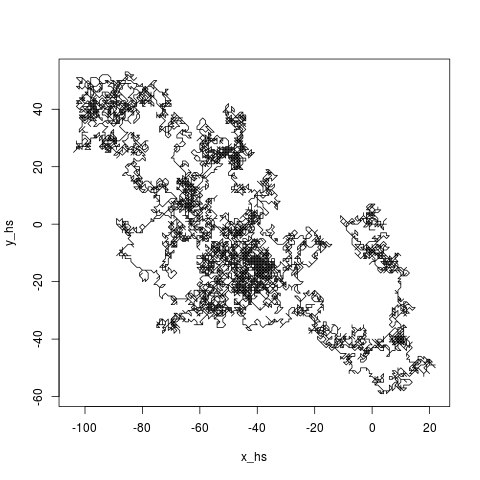

In [69]:
(x, y) = unzip $ map (fromIntegral *** fromIntegral) path :: ([Double], [Double])
[rgraph| plot(x_hs, y_hs, type='lines')|]

In [70]:
type State = (Double, Double)

In [71]:
jump :: State -> RVar State
jump (x, y) = do
    angle <- uniform 0 (2*pi)
    let (dx, dy) = (cos angle, sin angle)
    return (x + dx, y + dy)

In [77]:
path <- sample $ runH 10000 jump (0, 0)

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAADAFBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////isF19AAAgAElEQVR4nO2dBVwU2R/Af9uwxNLdLUhJLd0ogghKWAgWBnZ7Yhd2e2Lr3+4uPOtsvTPPBj07wKSk3n9mFwwatufm+/m4Ozvx3hu/zMx78woQCaEBSSeARLSQggkOKZjgkIIJDimY4JCCCQ4pmOCQggkOKZjgkIIJDimY4JCCCQ4pmOCQggkOKZjgkIIJDimY4JCCCQ4pmOCQggkOKZjgkIIJDimY4JCCCQ4pmOCQggkOKZjgkIIJDimY4JCCCQ4pmOCQggkOKZjgkIIJDimY4JCCCQ4pmOCQggkOKZjgkIIJDimY4JCCCQ4pmOCQggkOKZjgkIIJDimY4JCCCQ4pmOCQggkOKZjgkIIJToMEl30uE3U6SERE/YILx1vSgWYxoUgMqSEROvULTgw9nVOcez6muxhSQyJ06hfMecX7ytcQdVJIREH9gh3X8L52O4s6KSSioH7BV3Vt43vE2+tdrbrh/XYSKWBnsYCCUUlmRnpGZkm19ds6ZZBIHu/HggqurZi0bWlDjiURMT0EFVxrMYkULBUILLjWYhIpWCoQWHD1YtLRFB7cRMFSRiIUBBZcvZj0JYtHt1jBUkYiFAQWXGsxaXBC01NFIjQEFlxrMYkULBUILhh9KMc+St9XXU0KlgoEFnzXjmJ2AKEn1fYkBUsFAgv2G/ftjP41UrC0IrBg+S8I7XUtJQVLKQILtjqIUHn0b5IXfJBsVlITAgveo+jzFr13dpS44BFjxRufjCB4Lvr1HuwmXbR1ZNX14hY81US88ckIQigm1YKYBe+ANrPEGqGMIOOCb8zFPl7cwv756hkHjej7W+GnLTliiFd2kG3Bm+hqbVN1rSLRK8+bXwMADB2s/Wb4/f7hOW9rWXvs48Cq4//p3JdsC/623hQoQHtcPMy3PzoHoBKehS7HA3TkbV1LKUfogo1V57pbrRAb2RaMSmx63XiwxcsjNPDQufI+Vjc/3EExSgBDeBuHWL84dRT9OSrgtBhSIq3IuODdulYvsAdwIerazvNs4cpv/lEbO9jQfFqWYtu2UwGAvqm12WQxJERqkXHBwfeu8++/26wDzf3a+Gqa0YDpu3lSUKB5/w2YX7DjLHokhnRILzIu2L73eVT+x0eEijv8jv0sDWXBxuxudi1SgW462AsTzNEsF0MypBjZFpxJp9r08BnouR1z64X97m/cS8cAAq36dDR2CejquPDV3N9bnxd9MqQZ2RaMbrm6q1n/3ZPpMjZX3WcG8otV2eWLPXih5UP1dpoMzK1X655zR4shIVKLLAt+fODvoDhlMD0Vjz9sZ99HpX5t56Blc9d00+gdZ22vSNWwdGZQ3C2V1dqLOinSiywLvqbc+Qy6pQuOkxTsPa9Vri0rQWiEKgdz3rnLRT156EJVYMgdEXVapBZZFow2zEKo3dRWLmuZkZt/2fDBCPNLzeDQ6OAAWibqLZlvRJ4YKUWmBe+M3tBJIdxu7KQ2+37d8D4ADPBHMYCRKvYxIE/He/ZrkSdHKpFpwXmHVp9r3cqyxfzKt833x/JNf0zVAxNlGgVAjQH6nVq7Zqw26iHy5EglMi0Yp+TpxYqlHGeuukn09U15+I8VS0YrY3dp7PJVMEs7hoo9V3mIJTlSh8wL/sEwqp89KEaPdr2C/Wizy0sXLDSS2fjrrHQ0cpWYEyM1EEgwOtZThW0nN6LPoJ6L+joa89Qa4M9haBvdW9xpkRqII/jdHwhpn0HrGV2BzaQbAsgB+AFQ2DGTB70Qb1KkCeII/qDj9/QK+uSMF5BU8WISAI332bfww1fxJkWaIILgP5P24lVKK1I9c1Eq04CtFTbJnMI3LA9yTkmWRnq1H7xw8wNxpVMiEEHwUjprY3n/LhHKpp7deuagwiiKnmJzvC4YVHwwyTZr9o2q/eD9PuoFFYvFWTfFkl6xQgTBpwJXdF1ob6UBKpd3F6OXrQzwi9cJLyKpWIBCqrzLnra5Z2s59r0jBYbzukY+7edlhye5dG3GpqebWvf5JK7kixYiCEbHWjvZah8w/f1mGUJPWl19TWkOjMXqwAC79mq72wPLgaXuV8uhCaaqaw2t/8GW+hlYqPyLfZfNspJvoTB3h5fYki9SCCEYoZK179HNUF+XFM8OfmE66m7arm2VY1SA0p3exs6SSqfJh2E7lW9Lrnbg440Bt1VAT9UlzBG74l15TW7Lv6E3Q9SNiHEJE0RwBS/lbyX6pdFdD5rF25ho4CVhDlBpWGaaZdrWYkSEvObtJ4W/HFCSGJfYb+qaDrD06wgzoGpl7Z9zaubHvdiWbqwL4k+/CCCWYHSvbPUyY/4rSh5KSe4ABi0O5IZhpWI9bap8oFrz0KSqrXhuxgIlImVM13C2ko4qPdrVEaEv05mfKzcXbRDzWQgTggnOcio554CJ1Vvnh33M98QlOy91fPivhwqv4ESdtKY3d1fVoy6ah9MiSpZx41T+9jQ0HcjQTPg61bPd983TYL1YT0KoEEtwualcZ+yGbD3J/eFSrIAk1wlzaq8aeLwHk6a7++xE7jS7gnbdFPZXa4eXs2R3Fur5NzrpQ5+lmaSJX/TUPyq25Y8MAgXZvYaJJRjldLUxVtO3cLT6kpdWcZce46KsB5w/l+FXYczJ1Vxaa3hS47GnU7CPHfp++EEsyqLK1bN6xgOMz98noyOeE0ww+hapFuLlAtSD6WvV+YL15BkaAFN5W7d4BW/rmgE292s8tvPCzyhQIQT6AlA2f7/Kl1rv36qYEuavfuz7jp+Hy05nGKIJHpR0DysXK/goaWoN4WW1FPma1/E3P3ld3MbMSGn+qRoO/fJ1iaq/8YwWipfYGw/8WP35hYa/FjraN6RXxUFHoh21A/d+EfGJCAuCCX4chX9+9NqXah2O56r0j2JZ
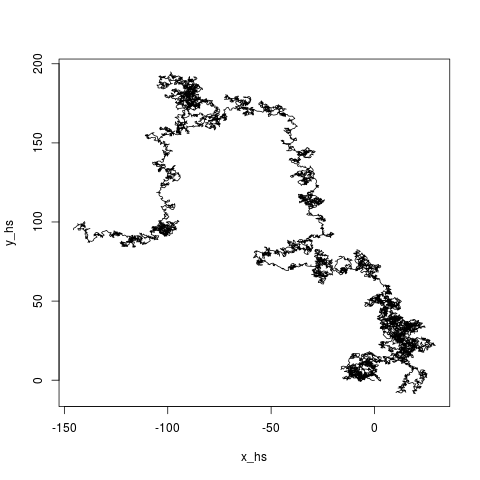

In [78]:
(x, y) = unzip path
[rgraph| plot(x_hs, y_hs, type='lines')|]

## Snakes & ladders

In [81]:
import qualified Data.Vector as V

In [82]:
ladders = [(11, 43), (25, 54), (40, 81),
           (60, 79), (73, 88)]
snakes = [(37, 2), (46, 20), (55, 29),
          (61, 8), (68, 13), (72, 49),
          (75, 22), (87, 67), (90, 77),
          (94, 31), (96, 11)]

board = V.fromList [0..100] V.// ladders V.// snakes

In [83]:
board

[0,1,2,3,4,5,6,7,8,9,10,43,12,13,14,15,16,17,18,19,20,21,22,23,24,54,26,27,28,29,30,31,32,33,34,35,36,2,38,39,81,41,42,43,44,45,20,47,48,49,50,51,52,53,54,29,56,57,58,59,79,8,62,63,64,65,66,67,13,69,70,71,49,88,74,22,76,77,78,79,80,81,82,83,84,85,86,67,88,89,77,91,92,93,31,95,11,97,98,99,100]

In [84]:
runUntil :: (a -> Bool) -> (a -> RVar a) -> a -> RVar a
runUntil f t x
  | f x = return x
  | otherwise = t x >>= runUntil f t

In [85]:
count :: (a -> RVar a) -> (Int, a) -> RVar (Int, a)
count t (k, x) = t x >>= \x' -> return (k+1, x')

In [87]:
move k x = randomElement [1..k] >>= return . go x
    where
        go x i | x+i <= 100 = board V.! (x+i)
               | otherwise  = x
game k = fst <$> runUntil ((== 100) . snd) (count (move k)) (0, 0)

In [89]:
:t game

game :: Int -> RVarT Identity Int

In [93]:
sample (game 6)

23

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC5VBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1vb29wcHBxcXFycnJ0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWYmJiZmZmampqbm5udnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////AFpWcAAAStElEQVR4nO3dfXwU9YHH8R8ELpAHEoyFkpCA4bFQiCF6UUQMNmhbnsXY1ifw1KoVOIHaekG9HrQ8nNpqLvjQ6x0cFMFWr154Foxe8Aql7VIBERAoJJACAnn+/X2bzWRmsnmYh33I/L77/bxekmFmfzOTvrvZ/ZHdHSEZdKK7T4BFNgKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBk9R4HohDvu/TBPLpRD14drrJyN6vqz/5aAYJeUosbnDW14TceE6aITDAs4T5aHs9QExaZf+FwJ3Zybgy5eb9NUhAk8Tm4y/ELg7M4AD/1PvuT3p+ukH/b5CrJOXFgxPyCn1q5+/r3/ur0WePCPSPszbKMtuSUq9c588LLLXpGe9VJ6beMfRlp21Dmge/uPAmjOzUseXtgHWjtCa/6jvj0++p7rdBs+lLvDonJyc5Bbgyn49Zk4W6VfeGyqWHWsqEJnT+opVsmmiyJ0dHwBOzBQbT/SNK7hZZDYdFuLvRvn/G5YoZgf2pQ94L0cs+H1g72NFZm5PM3DrEVqPf02IPmN6isXtNngudYFbCgBvEyP+KhfeczjwI3qHyLwkd4mUxp1idK18PgAsllfV7Lz7BVnbR5zzA/vkZPHdpu1iWGBf+gD/D4QWzk1i7JWmx83A+hG0/MCb5Bpxe7sNnktdYNOP6KrrRI/858+0PAa/Ip70b8kQx18WC6X8UwC4T6N/1V9+MitLiDOHRYaU94tS/8/qIYF96QN04GJRLOVOM7B+BK1rokeD3Ovfd/AGzwUBLKtfuFGIfp+agLPE0Z+KBVL+seUx2L/mw94J97+W1Aw8pBn4jSBg/wAd+DmxTMoP2jwGtx5BK3DUcv++gzd4LgjgTQ/9Un4+UbzsB94jt4usS36dfo1bxLAv5WId+BmxRH4iOgDWB+jA68W4q/JJM7B+BC0dOHiD54IA3ib6zJ6bIHb6H1rn/LFpssianiBWy9pskel/YtwKvFKkzBjQQ3zRDlgfoAP7Rw6ZIFqAM8f6+2/9CFo6cPAGzwUBLNff3C9h/BtSvj3QP026+HR2Qs5a/zTp6NTkMf+mA385J+Fr/1kgStoBGwNageXxb/Ubs7oFONA6/Qhaxo/ooA2eS1FgO1WVH2hGuLu7z6N7Awb+tFeP4jUjxNruPo/uDRhYlk1OSbyxtMn6hrbb3Dr93hjGnUY2ZGAmCQwfgcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwIgO8foWRdz9hKCaKDPCkMqOccH6GAnNaZIALTMtTCNydERg8AoNHYPAIDB6BwSMweAQGj8DgERg8AoNHYPAIDB6BwSMweAQGj8DgERg8AoNHYPAIDB6BwSMweAQGzxZw48VGZ3slsGeyBr5WPKKXiBu+rMbBXgnsmayBH5i6s6ru/N7Z8x3slcCeyRo45XTgy5XrHeyVwJ7JGjjn9cCXt3Md7JXAnskauGLQmKJHisalVzjYK4E9k41n0fVlJStKyuqd7JXAnonTJPA4TQKP0yTwOE0Cj9Mk8DhNAs/NNOmdewMV/qLTIQT2TG6mSXUXAr3+804HENgzhTBN+q9XOx1DYM8UwjSJwCoUwjSJwCoUwjSJwCoUwjSJwCoUwm+TCKxCdqZJF5qJGiqDVxNYhayB/zy2R/ZvpTzW7pYEViFr4Mn/VLsrYx+BFc0auO8lKbfc1EBgNbMGHvmulE2zfkRgNbMG3pw06ayszM0hsJLZeBZ9ZrP/h3TN+iXB6wmsQiG8+YzAKkRg8AgMHoHBIzB4kQeeWLFP70/uj8bcFXng/o8ZDb3o/nDMVVEANr1gb1a1+8MxVxEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKD5+a6SVoEVqHIXzeJwN1a5K+bROBuLfLXTSJwtxb56yYRuFuL/HWTCNytRf66SQTu1jhNAo/TJPA4TQKP0yTwOE0Cj9Mk8DhNAs/mrwvPmWV+XRho3KJOb05gz2QNPP2EPHlLz95TTgVv4D1YhayB432y6OErdUtmB28gsArZAs4+JGV1v+ANBFYhG8Db62e8J+Xu9OANBFYha+CpWfGpo+WO1DXBGwisQnaeRdcd2SM/2tFuNYFViK+qBI/A4FkD+1oL3kBgFbIGzhcJGYGCNxBYhayBm+Y91fEGAquQjcfgrSs7Xk9gFeKTLPAIDF50gWccu6BH66gUXeD0affqDf3C/aGZ7aILPOhzY/kh0zKLWAQGj8DgERg8AoNHYPA04Kd3NTgeSmAV0oCLxw98Ylv717Z3GYFVSP8RfXT17QMffb/OwVACq5AOXL3x4f5jb01/2/5QAquQBvyzgsS7XvlMyh1ftT+UwCqkAc/bdCnw9Uveg8HSgGtfLZObV7b7lIYuI7AKacAPTqiQ+2+b52gogVVIA0466v/jeIqjoQRWIQ142Ef+P8qzHQ0lsAppwOvSnl618Po3HQ0lsAq1zoMPvfB48X5nQwmsQvxlA3ga8NZbRzXnaCiBVUgDzlp6sKO3H3UZgVVIAx501flQAquQBrxyucPfFUoCq5EGfFti8kg+BiOmAXfyFuAuI7AK6dOkhtNNDocSWIU04NOFfZOO5R91NJTAKqQBf/f7VwY2Ft/paCiBVUgDvq5aDpQXEhwNJbAKacDjf+sH3j7W0VACq5AGvDNtbt+Hv/I7R0MJrEKtz6Kr3nyx9LSzoQRWIf42CTwNOL8lR0MJrEIacHl5+Ycb
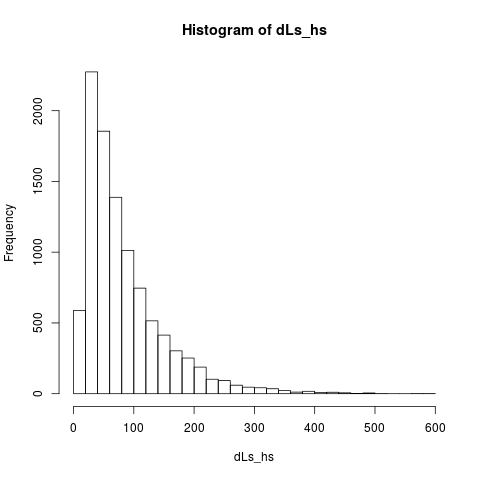

In [94]:
ls <- sample $ replicateM 10000 (game 6)
dLs = fmap fromIntegral ls :: [Double]
[rgraph| hist(dLs_hs, breaks=40)|]

In [95]:
import Statistics.Sample

In [100]:
mean . V.fromList $ dLs

33.9972

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC6FBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dJSUlLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICCgoKDg4OFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////9Ewt8AAATCklEQVR4nO3de3xU5Z3H8SegG3IPhDZCTNgNkCARAqY2IrfAhlqkgogsVCuL1lpLDa33WhR3pQZY7TVNtV22ixURvPQWhNCCqQtdpbhOLUaKYrgkJBIu4RLy/LtnZp7nJJkzmTNn5pw55/nN9/N6AYdz5lyGN8zMw0yeMI5Ix9y+AORsACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJpyjwRcYOaL/MZU9xxi7addQ/jx30rP6b/ayU81K2Jewtu9hgu07qcLSAK1hTPEe9jU3bqf8GwG7WB/jUqR59dZzAc9nm3t8A2M16gQN/1LumZw6/cb/my9hG3nnfmPTyek39xOKhk19iFfwIy3uzYhNvuC4zd/ZefoAVrx9Z9EzT5IyZzcGDyR38u38nsObI/NyJ9f2AxRlk2ll/PzFrYYdhg+dSF3hceXl5VhC4NTvlphls5Jlf/yN7/GBPFSucm8bW8p7r2eQFqQHgjEK26aO0wVXXssKeA4z9Q6n2Y3QGWxA4lr7Dr8vZfW8Hjl7GCicP6gsszyDP38XYkPGD2AOGDZ5LXeBgAeA32NijvGbhgcBD9A5W2Ml3spxLjWzcef5EAJg91Xau8YbV/PwQdlwD9vEZbEnPdjY6cCx9B+0BIci5mZWd6bm7L7B+BpEGvJmvZ9MNGzyXusB9HqLbhrGUyieOBJ+Dv8++rm0pYIeeZTWc/18AeMglbdX7/za/iLEjB1gB50tZvfZYPSpwLH0HHXgVW8V5Y19g/QyiLpbSzXdrxw7d4LlIAPOO1ZMYy/5bH+Ai1vw9dh/n7wafg7U1b16evvQnmX7gUX7gn4cAazvowI+xxzn/Y7/nYHkGUeCsTdqxQzd4LhLAm7+ygf/9evasBryLb2dFnZpO9qWtbPRp/oAOfD97kP+ZhQHWd9CBX2ATzvKv9wXWzyDSgUM3eC4SwG+wIQtuSWeN2lPrze/2zGBFN6azdfx8MSvUXhhL4FqWM++zKeywAVjfQQfW9hx1DQsCF5Zp/UY/g0gHDt3guUgA8xeuzU6f+HPOX87XhkknVxSnlz+nDZOa52SN/6kOfPrm9Kv+u4rVGYB7d5DA/NAXs8evCwIH2qifQdT7EB2ywXMpChxNbU37/Ag3uH0d7kYY+G+XpaxaP5Y95/Z1uBthYN4wIydjUn2P+Q2jboscfm+y8aDORhkYcQCTD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATLzEAB9eI/thQs6H9BID/OrdDaLJCTkf0osK+NLJS/Gd5dW1cqkqvgMhq5kDd60aexkbPObxc3GcBcCuZQ5825zGtgsndi/41zjOAmDXMgfOaQn8cmZ4HGcBsGuZA5c/H/jl5XheHgHYtcyB94wYf+vyWyeM3BPHWQDsWlG8ir7YULemriGu710DYNfCMIl4GCYRD8Mk4jk6TJpeIbpikVwF4ATn6DBJ13xsnmEVSkyODpMA7H6xDJNONQd6v8NsTwC7XzTDpHb/pOndrfrvf/fVQHMeNtsRwO5nDvxeWUrxa5wfNNzyV6Zv3gPY/cyBZ3z3/M6CvQBWNHPgtE7Ot36uG8BqZg5c8jrnPfMfBbCamQNvyZx2jLdOLgewkkXxKvrIFu1B+twLD4auB7AKxfGpSgCrEICJZw7sk4VuiAl4eLWo8gcWrhLFnDlwJUsvCBS6ISbgXLmwbXVU14fizBy4Z9m94TcAWIWieA7eVht+PYBVKNEvsgCc4ABMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxItjrkoAq1Acc1UCWIXimKsSwCoUx1yVAFahOOaqBLAKxTFXJYBVKI4p/QGsQhgmEQ/DJOK5NkzaULZIdFtPVFeKYsq1YVLtjHbR9Di/pQuKlGvDpNrZcmk2gB3MtWESgBNTLMOkC8GH1udNpzIDsPvFMkx6Jfji6Lpvm+0HYPdzbZgE4MTk2jAJwInJvWESgBMShknEwzCJeK69mwTgxOTapyoBnJgATLxET+kP4ATn2pT+AE5Mrk3pD+DE5NqU/gBOTHiRRTwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMTzAHDhP4tvCl71s9gvBg2QB4CHyk8DvflI7BeDBgjAxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPNfmiwZwYvLARGgAdjIPTIQGYCfzwERoAHYyD0yEBmAn88BEaAB2Mg9MhAZgJ8MwiXgYJhEPwyTixTJMein4lSYTVprtCmD3wzCJeBgmEQ/DJOJF+Xbhpx3GdQBWIXPg92YtbJuXOnjmx6EbAKxC5sAz7r0/7+FzXTXzQjcAWIXMgdOOdqZ0cd6RFboBwCpkDly0rYm9xXljaegGAKuQOfCPLs/+0cjly3I3hW4AsApF8Sr6QAv3Pf3UfsN6AKsQPlVJPAATD8DEAzDxBPCKnd2WdwWwCgngVRPz73nD+H5CxACsQvpDdPO66fl3/f6ChV0BrEI6cMemO4aWTRn5cvS7AliFBPDTVRlf+P6HnO+4IvpdAaxCAnjZ5s7Ar6fxL5hYAvj8Dxv4llrDJ2MjBmAVEsC3X7OHvzN1maVdAaxCAjizWfvpUI6lXQGsQgJ49J+0n5qKLe0KYBUSwBvzVqytGf4LS7sCWIXkOPivq+9e9Y61XQGsQl56s+GXw8W3X6ku6Yr9slC/BPC2KaX+LO06EHBLnaxMrooOuH6KXDWv09KVoIETwEUP7fdpWdp1
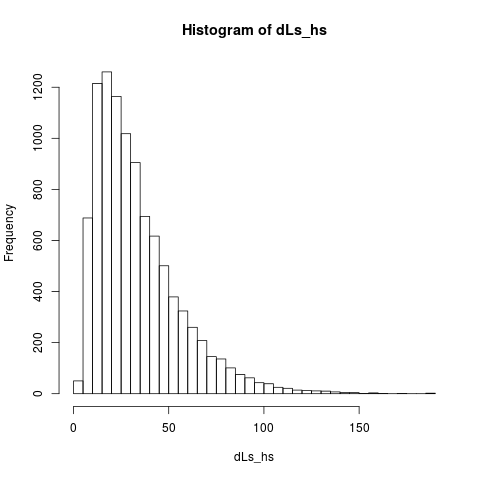

In [99]:
ls <- sample $ replicateM 10000 (game 20)
dLs = fmap fromIntegral ls :: [Double]
[rgraph| hist(dLs_hs, breaks=40)|]

### Snakes & ladders with infinite tree

Nice, bit leaks memory.

In [25]:
import Data.Tree

In [26]:
ladders = [(11, 43), (25, 54), (40, 81), 
           (60, 79), (73, 88)]
snakes = [(37, 2), (46, 20), (55, 29), 
          (61, 8), (68, 13), (72, 49), 
          (75, 22), (87, 67), (90, 77),
          (94, 31), (96, 11)]

board = V.fromList [0..100] V.// ladders V.// snakes

In [27]:
board

[0,1,2,3,4,5,6,7,8,9,10,43,12,13,14,15,16,17,18,19,20,21,22,23,24,54,26,27,28,29,30,31,32,33,34,35,36,2,38,39,81,41,42,43,44,45,20,47,48,49,50,51,52,53,54,29,56,57,58,59,79,8,62,63,64,65,66,67,13,69,70,71,49,88,74,22,76,77,78,79,80,81,82,83,84,85,86,67,88,89,77,91,92,93,31,95,11,97,98,99,100]

In [28]:
snakeSpace :: Int -> Int -> Tree Int
snakeSpace _ 100 = Node 100 []
snakeSpace k x = Node x (fmap go [1..k])
  where
    go i | x+i <= 100 = snakeSpace k (board V.! (x+i)) 
         | otherwise = snakeSpace k x

In [29]:
win (Node 100 _) = True
win _ = False

In [30]:
randomTreeWalk (Node _ next) = randomElement next

move :: (Int, Tree a) -> RVar (Int, Tree a)
move (k, s) = randomTreeWalk s >>= \n -> return (k+1, n)   

In [31]:
runUntil :: (a -> Bool) -> (a -> RVar a) -> a -> RVar a
runUntil f t x
  | f x = return x
  | otherwise = t x >>= runUntil f t

In [36]:
game k = fst <$> runUntil (win . snd) move (0, snakeSpace k 0)

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC61BMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1vb29wcHBxcXFycnJ0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///9fDAU/AAASwklEQVR4nO3deXxU5b3H8YcEGsgOoaUkJGhYSwqRpGwCBg3aVpDFGsvFKrXUixaxFVvlhhZrxbJU2+utaYp62wsFWazQ9oZVg7ENLlxahwIpAgKFBKaELes8f96TyZlnJrNwznNmJnOe33w/r5dwOGd+MwfeMpOHTHIYR6RjsT4BFN0ATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABNPUeBWxo5qP93NnueMtUbqXt8flvCS+MUhNoLzEWxr0FteZ4mRetAoRwu4mNWEc68PsMn7xC8AHMt8gC9fdondYQLfzTZ7fwHgWOYFdv9RV09J7T/jkObL2Hre+PjQ5MJKTf3C/X3HvsGK+VmW9W7xJl41ITXz9gP8KMtfm533Ys3YlNvqOu/MM9Ax/ox7z9nZmWMquwDrj+BJe9Q/jUm71xlwwHapCzyysLAwrRO4Pr3HrKks++qOm9jy464Slnt3H7aauyaxsXOS3MApuWzTyT6JJeNYrusoY58Zof03JIXNcd+XGNhRyB7/0H3vBSx3bIIvsOcRPI9/nbHeoxLYkwEHbJe6wJ25gXexYf/kS+496n6K3sNyG/k+ltG+l41s5j90A7PnG5r23rWCN/dm5zVgB5/K5rl2syHu+xID2hNCJ+dmVnDV9YgvsHgEPQ14M1/LpgQcsF3qAvs8RTf0Yz3G//Bs52vwz9mj2pEcduIltoTzv7mBe7dru/7+3Ow8xs4eZTmcz2eV2nP1YPd9iQEBXM7KOd/rCyweQe8669HG92v37X/AdpEA5s4VtzCWfsQHOI/VvcAe5/yvna/B2p53eyXPfyW1A3hwB/BrfsDagABexpZz/k6X12DPI+i5H7VGu2//A7aLBPDmB3/DP5nEXtKAq/lulteo6aS3b2NDrvAnBfD32FL+PgsCLAYE8AY2+hp/1BdYPIKeAPY/YLtIAO9ived8LZnt1V5a5/7VNZXlzUhma3hzPsvVPjD2AK9iGTM/14N9GgAsBgSwNjm4iHUC5xZo/UE8gp4A9j9gu0gA8w3j0pPHvMb5lgHaMunS4vzkwnXaMqluetqoXwngK3OTv/A/JawiANg74AHmJ76SPmpNJ7C79eIR9LxP0X4HbJeiwGZqqDnYgXBXrM8jthEGPtKzR/naYWxdrM8jthEG5lVTM1JuqXQZ39B0Wz3L700RvNPoRhkYcQCTD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATLyoAK9bKVofjftH5osK8Lgq0a3RuH9kvqgAlwTdRLEIwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPFPA7Zfape4UwPbJGPh6+bCeLHHo8ibzdwpg+2QM/MD0vQ0tF/bP+ab5OwWwfTIGzjjj/ulqf/N3CmD7ZAxc+Kr7py1jzd8pgO2TMXDtwFFlD5eNzq41f6cAtk8mPopurapYWVHVKnGnALZPWCYRD8sk4mGZRDwsk4iHZRLxsEwiHpZJxLOyTHqj1F3RilC3B7B9CmOZ9LuXQ40A2D6FsUwCsAqFsUwCsAqFsUwCsAqFsUwCsAqFsUwCsAqZWSZddGk/tNX77wawChkDf1zQI/8tzo8H3BLAKmQMPPU/mvflHACwohkD92nkfNuX2gCsZsbAw7dz7pr9NIDVzBh4a+rkc7x+bCGAlczER9Fnt2pP0k0blvrvB7AKhfHFZwBWIQATD8DEAzDxAEw8ABMPwMQDMPGiDTypThTw+UbUDUUbuM+3RVOtPxSyXLSBM4PuRd0WgIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4oVx9VEAq1C0L6sD4BgX7cvqADjGRfuyOgCOcdG+rA6AY1y0L6sD4BgX7cvqADjGYZlEPCyTiIdlEvGwTCIelknEwzKJeFaWSUc2unviuVATALZPJj9deN7p84uDFe4W/ijUrQFsn4yBZ5zkpyYk9Jp22v8AnqJVyBg4ycHLHrrasnSO/wEAq5Ap4PzDnDvT/Q8AWIVMAO9unbmD87ez/Q8AWIWMgafnJWWO5Hsy1/ofALAKmfkouuVYNX9vT8BuAKsQ3lVJPAATzxjY4cn/AIBVyBh4PEvOced/AMAqZAzsWvBY8AMAViETr8E7VwXfD2AVwgdZxAMw8QBMPB148b426VEAq5AOXD5mwKJdge9tv2EAViHxFF23ZsqAhX9qkRiVBe5d7KlottQ5ojASwM5ND/UtmJi9xfyoLLB3s+0O84+CwksH/mlJyp0//wfnez5vfhTAKqQDL9jc6P75Cv4GE0sHbn65im9dFfDlRzcMwCqkA3+jqJZ/dOsCqVEAq5AOnFqn/XAiQ2oUwCqkAw95T/uhJl9qFMAqpAOvz1q8ekn/16VGAaxCnnXw4RWPlH8kNwpgFerGTzYAOBbpwDsnjuhIahTAKqQD5z11KNj76m4YgFVIBx54TX4UwCqkA696XvJzhRzAaqQD35qSNhyvwRTTgUO8t/2GAViFxDKp7YxLchTAKqQDnyntk3p8fJ3UKIBVSAee9+9XB7SX3y41CmAV0oH7OfkAfjFZahTAKqQDj3lLA95dIDUKYBXSgfdmfa3PQ5/9o9QogFXI81F0w+vPVp6RGwWwCuGzScTTgcd3JjUKYBXSgWtqat7deNtGqVEAq5Dv
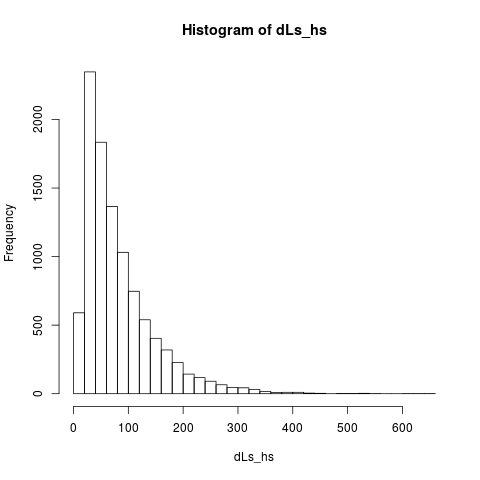

In [43]:
ls <- sample $ replicateM 10000 (game 6)
dLs = fmap fromIntegral ls :: [Double]
[rgraph| hist(dLs_hs, breaks=40)|]

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC7lBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKCioqKlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///+iQ0kAAAATX0lEQVR4nO2de5gU1ZmHz4AuMBdmYFSEYSByG2SE4RLlPowsYgyycjG6ijEsYlaNK9kNoq6iK9lFRYiaGCezxGSFFRGMJCZchAiOWUjERWlXnBDEcJubDHcY+vy31XVON9MXurqqT1fV+fr3Pg+cp86p89Wpeae765uu/ppxQBrm9QJAZoFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCYOBBMHgokDwcSBYOJAMHEgmDgQTBwIJg4EE0dTwecY22M0U9hiztg5VVH/2L/di5GNXayM8zK2JuGep1h7VQfNMLQEj2C16US9i43bEtmAYC9pI/jYsWCkO03BU9jqCxsQ7CUXBJs/6q3j8y+7eZfhl7EVvOWhfrkVNYb1xtu7DHuDjeAHWfH7I1bx9aPyiybu4HtYn2U9er1QOyxvQp0IFp4Qmv6vZs/BaUVDaqIEyyOEMY76uyEFM5vjBnyHvoIHVlRUFAjB9Z1zbqlkPU78+mvsyb3BKlY6pRN7ngfHsGHTO5iC80rZqi86ta+6lpUG9zD2N2XGv755bLoZKzLh1xXsoQ/N6OWsdFi7toLDRwgf/xRjHQe1Y/PjBnyHvoIFpuCNrP8hPm/mHvMp+l1W2sK3sMLzm9nAM/wpUzBb3HB6841P8zMd2RFDcIBXsjuCm1hfM1ZkgvGEIHSuZuUngt9tKzhyBIkheDVfxsbHDfgOfQW3eYpu6MpyRj51ULwGv8TuN0ZK2L4X2TzOPzEFdzxvdP3fv0/rxdjBPayE81msxniu7m3GikyICF7IFnK+ua3gyBEkp1hOK99mxI4d8B0kBPPmp4cy1vmzNoJ7sbpn2UOcfyxeg42e9y/NnfVKfkhw75DgV2MEGxMigh9nT3L+XtRrcPgIEvOotUbs2AHfQULw6rt/yf8yhr1oCN7KN7FeLYadzufXsr7H+fyI4B+wh/kfWQLBkQkRwSvZ4JP8/raCI0eQRATHDvgOEoI3so7Tb81lm42X1hkfBytZr5tz2VJ+pg8rNS6Mw4KXsMKpV+SwL+MERyZEBBszew9nQnBpucFvIkeQRATHDvgOEoL5yms75w55lfM3uxlp0tEH++RWLDfSpLobCgb9LCL4+Izcq1+rYtVxgi9MCAvm+27qPGipEGyyInIEyYWn6JgB36Gp4FRoqP0oJOFGr9fhLYQFf3ZJzsJl/dlyr9fhLYQF8/WVhXlDa4LWO6bMmnD6vUph0MxCWTDgEEweCCYOBBMHgokDwcSBYOJAMHEgmDgQTBwIJg4EEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCYOBBMHgokDwcSBYOJAMHEgmDgZF/zGM4LfZvpAICEZF1y53mT1zEwfCCQkJcHnj553fIAq0TRAsDdYCz61sP8lrH2/J087OwAEe4u14Ltu2NxwtnHb9H9wdgAI9hZrwYUHzObEZc4OAMHeYi244udm8+YwZweAYG+xFry9+6Db5tw2uMd2ZweAYG9J4Sr63PrqZ6rXO/3uGgj2FqRJxEGaRBykScRBmkQcpEnEQZpEHCdp0q5qk+c/SOUAEOwtqaRJTaGi6a31ke1PhOC5P0zlABDsLdaCd5fn9Hmb871xe/73T1I5AAR7i7XgyifObCnZAcGaYi24Uwvna7/eCsF6Yi14wDrOg9Mesyv4gwWCq8QmBHuEteA1+eMO8/phFTYFL/7xDpMCsQnBHpHCVfTBNcaT9OmVD8f2Wwh+R7RFooFgj0jjrkoI1gEIJo614ECY2AEI1gFrwSNZbolJ7AAE64C14ODsBxIPQLAOpPAavGFJ4n4I1gFcZBEHgokDwcRxS/DBgeJP049+6vyAwAFuCf7sMvE54fmvOj8gcIBrgmUa/SoEuwsEEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCYOBBMHgomTRq1KCNaBNGpVQrAOpFGrEoJ1II1alY4Evzxf3D77np1FAuekUavSkeB7hogb4Msa7awSOCaNWpWOBM+ZI9qZDTYWCZyTRkl/CNYBt9MkCHYZt9MkCHYZt9MkCHYZt9MkCHYZt9MkCHYZpEnEcZIm7Rd/jHr82WSzINgfOEmTPhBf2n7nE8nmQLA/QJpEHKRJxEGaRBykScRBmkQcvJtEHLfvqoRgl4Fg4rhV0h+CPcKtkv4Q7BFulfSHYI9wq6Q/BHsELrKIA8HEgWDiQDBxIJg4Xgn+2+Wvm2xzfnyQCl4JLllUbVLp/PggFTwTvEe0Vc6PD1IBgokDwcSBYOJAMHEgmDgQTBwIJg4EEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxvKoXDcEu4VUhNAh2Ca8KoUGwS3hVCA2CXcKrQmgQ7BJeFUKDYJfwqhAaBLsE0iTiIE0ijpM0qaXO5KUXkk2DYH/gJE367b0mkxYkmwbB/gBpEnGQJhEHaRJxUny78Kvm+D4I1gFrwbuvn9kwtUP7CftjByBYB6wFVz7wg+JHTp+aNzV2AIJ1wFpwp0MtOac4by6IHYBgHbAW3GtDLfsD55vLYgcgWAesBb98aeeXe8yZXbQqdgCCdSCFq+g9B3jgucW74vohWAdwVyVxvBY8WrxxUXfW+TpAMrwW3FG8cXHTc87XAZLhtWA5/M5i5+sAyZCCH9zSansqBOuAFLxwSLf7Nsa/n5AUCNaByFN03dLx3eb+zs61DgTrQERw86rvdCkf3ePN1KdCsA5Iwc9V5U1+6c+cv3tl6lMhWAek4NmrW8z2OB7BxJCCz/xkPV+zJO7O2KRAsA5Iwd8evp3vHDvb1lQI1gEpOL/O+G9foa2pEKwDUnDfD4z/avvYmppY8KlV4huv7pRv
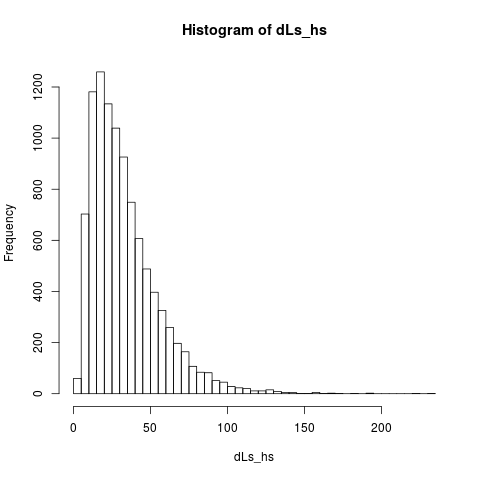

In [42]:
ls <- sample $ replicateM 10000 (game 20)
dLs = fmap fromIntegral ls :: [Double]
[rgraph| hist(dLs_hs, breaks=40)|]

# `Num` typeclass

Don't think so. Confusing. Sometime you want to add different, sometimes you want to multiply the same. Can be pretty confusing with stadard syntax.

In [49]:
:ex TypeSynonymInstances
:ex FlexibleInstances

In [51]:
import Control.Applicative

In [61]:
instance Num a => Num (RVar a) where
  (+) = liftA2 (+)
  (*) = liftA2 (*)
  negate = fmap negate
  abs = fmap abs
  signum = fmap abs
  fromInteger = return . fromInteger

In [75]:
dice2 = randomElement [1..6] + randomElement [1..6]

In [76]:
sample dice2

7